<a href="https://colab.research.google.com/github/gautumsvp7/EnergyGenerationDataset/blob/main/Electricity_gen_1949to2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving US Electricity Net Generation By Energy Source 1949-2016.xlsx to US Electricity Net Generation By Energy Source 1949-2016.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.cluster import KMeans 

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn import metrics 
from scipy.spatial.distance import cdist 

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['US Electricity Net Generation By Energy Source 1949-2016.xlsx']),header=0) 
df

,Annual Electricity Net Generation (Million Kilowatthours),1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Electricity Net Generation From Coal, All Sectors",0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,"Electricity Net Generation From Petroleum, All...",0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,"Electricity Net Generation From Natural Gas, A...",0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,"Electricity Net Generation From Other Gases, A...",NaN,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,Electricity Net Generation From Nuclear Electr...,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,5

In [4]:
mdf =df.fillna(value=0)
mdf

,Annual Electricity Net Generation (Million Kilowatthours),1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Electricity Net Generation From Coal, All Sectors",0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,"Electricity Net Generation From Petroleum, All...",0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,"Electricity Net Generation From Natural Gas, A...",0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,"Electricity Net Generation From Other Gases, A...",0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,Electricity Net Generation From Nuclear Electr...,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.

In [5]:
mdf.describe()

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01
mean,0.153846,0.153755,0.153588,45557.582923,51398.092462,57738.208462,62127.602000,68776.702000,73270.402769,84661.363385,92903.963538,97637.287231,99761.671077,109750.589385,116793.198154,122634.521692,131991.331692,141542.810923,151879.742462,1.628286e+05,1.765434e+05,1.873532e+05,2.050501e+05,2.223782e+05,2.361710e+05,2.485929e+05,2.696890e+05,2.867779e+05,2.877414e+05,2.955007e+05,3.139867e+05,3.272996e+05,3.399041e+05,3.462562e+05,3.522462e+05,3.535344e+05,3.452881e+05,3.559147e+05,3.722254e+05,3.804619e+05,3.831494e+05,3.961981e+05,4.165248e+05,4.561894e+05,4.670799e+05,4.725276e+05,4.741573e+05,4.916073e+05,4.993368e+05,5.156055e+05,5.296003e+05,5.369794e+05,5.566938e+05,5.681228e+05,5.845705e+05,5.739524e+05,5.925675e+05,5.963328e+05,6.097599e+05,6.229250e+05,6.243408e+05,6.385583e+05,6.328440e+05,6.068257e+05,6.336357e+05,6.297022e+05,6.216726e+05,6.244877e+05,6.287501e+05,6.262442e+05,6.264351e+05
std,0.292809,0.293019,0.280906,86707.742824,97659.865930,110580.057070,118568.821431,131056.828195,140373.151046,164428.213865,181394.089254,189581.532115,192849.806690,211963.560342,225655.000095,236833.023395,254666.477615,274147.837114,293800.053024,3.153794e+05,3.411401e+05,3.597420e+05,3.930283e+05,4.222388e+05,4.438531e+05,4.635566e+05,5.014602e+05,5.340030e+05,5.328071e+05,5.459309e+05,5.833537e+05,6.081831e+05,6.268146e+05,6.460472e+05,6.645746e+05,6.714240e+05,6.583101e+05,6.822826e+05,7.169452e+05,7.373007e+05,7.389697e+05,7.688629e+05,8.094899e+05,8.714716e+05,8.901416e+05,8.988939e+05,9.054589e+05,9.387404e+05,9.516020e+05,9.796189e+05,1.009565e+06,1.025254e+06,1.058588e+06,1.078290e+06,1.114305e+06,1.094272e+06,1.126459e+06,1.134684e+06,1.156887e+06,1.180915e+06,1.182988e+06,1.209924e+06,1.197506e+06,1.135464e+06,1.187297e+06,1.170207e+06,1.149135e+06,1.153024e+06,1.159349e+06,1.150131e+06,1.145723e+06
min,0.000000,-0.001155,-0.001639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.507741e+03,-4.541435e+03,-4.176582e+03,-4.035572e+03,-3.377825e+03,-2.725131e+03,-3.088078e+03,-4.039905e+03,-4.467280e+03,-6.096899e+03,-5.538860e+03,-8.823445e+03,-8.742928e+03,-8.535065e+03,-8.488210e+03,-6.557788e+03,-6.557842e+03,-6.896352e+03,-6.288062e+03,-4.627345e+03,-5.501132e+03,-6.420516e+03,-4.950496e+03,-4.681033e+03,-6.173548e+03,-5.091488e+03,-6.686127e

# Data preprocessing
Data visualisation 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdffecaecc0>,
      dtype=object)

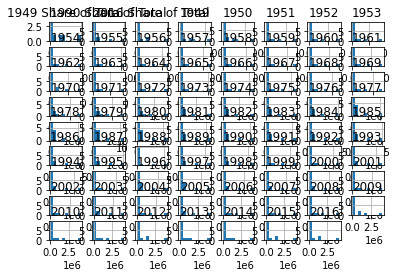

In [7]:
df.hist()

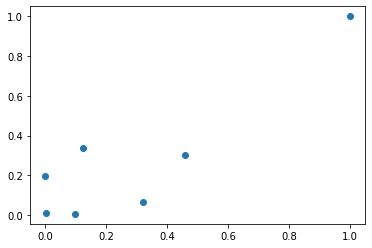

In [8]:
x1 = df['1949 Share of Total']
x2 = df['2016 Share of Total']
plt.scatter(x1,x2)
plt.show()

#Implementing K means


In [9]:
Y = df['Annual Electricity Net Generation (Million Kilowatthours)']
Y

0     Electricity Net Generation From Coal, All Sectors
1     Electricity Net Generation From Petroleum, All...
2     Electricity Net Generation From Natural Gas, A...
3     Electricity Net Generation From Other Gases, A...
4     Electricity Net Generation From Nuclear Electr...
5     Electricity Net Generation From Hydroelectric ...
6     Electricity Net Generation From Conventional H...
7     Electricity Net Generation From Wood, All Sectors
8     Electricity Net Generation From Waste, All Sec...
9     Electricity Net Generation From Geothermal, Al...
10    Electricity Net Generation From Solar, All Sec...
11    Electricity Net Generation From Wind, All Sectors
12        Electricity Net Generation Total, All Sectors
Name: Annual Electricity Net Generation (Million Kilowatthours), dtype: object

In [10]:
X=df.drop(['Annual Electricity Net Generation (Million Kilowatthours)'],axis=1)
X_f=X.fillna(value=0)
X_f

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221
5,0.000000,-0.0

Removing share columns in X_f

In [22]:
X_f

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster
0,0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066,3
1,0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706,4
2,0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217,0
3,0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050,2
4,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221

In [23]:
X_mod = X_f.drop(['1949 Share of Total','1990 Share of Total','2016 Share of Total'],axis=1)

In [24]:
X_mod

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster
0,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066,3
1,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706,4
2,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217,0
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050,2
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221,0
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [30]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,13) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_mod) 
    kmeanModel.fit(X_mod)     
      
    distortions.append(sum(np.min(cdist(X_mod, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_mod.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_mod, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_mod.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [31]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 4371550.206898556
2 : 2094264.6243885497
3 : 1189175.0887696166
4 : 524008.7149940605
5 : 295212.0588113308
6 : 164296.38947291003
7 : 67165.8793168223
8 : 27405.073019583146
9 : 18204.068424836387
10 : 9600.030068274598
11 : 4402.871214159407
12 : 2371.3833142670983


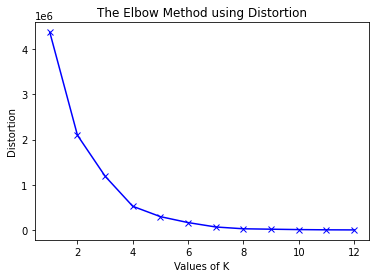

In [32]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

Taking k as 4

In [33]:
kmean = KMeans(n_clusters = 4,n_init=10,max_iter=300)
kmean.fit(X_f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y_predicted = kmean.fit_predict(X_mod)
y_predicted

array([2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [35]:
X_mod['cluster'] = y_predicted
X_mod

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster
0,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066,2
1,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706,0
2,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217,3
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221,3
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

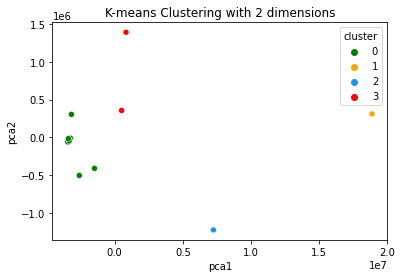

In [42]:
#Running PCA to reduce dimensions
pca_num_components=2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X_mod)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=X_mod['cluster'],palette=['green','orange','dodgerblue','red'], legend='full', data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()